## Problem Set 4

### Joseph Denby

In [89]:
import numpy as np
import pandas as pd
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import sklearn
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')
from pandas.plotting import scatter_matrix
%matplotlib inline

#### Problem 1

a. Import the data using `pandas.read_csv()` function. Look for characters that seem out of place that might indicate missing values. Replace them with missing values using the `na_values=`... option.

In [2]:
auto = pd.read_csv('../../../ProblemSets/PS4/Auto.csv')

In [3]:
auto.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

There is a '?' value included in the horsepower column.

In [4]:
auto[auto.horsepower=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


I'll reload the dataset filling in those values as NA's, allowing the column to be treated as holding numeric types.

In [5]:
auto = pd.read_csv('../../../ProblemSets/PS4/Auto.csv', na_values='?')
auto.horsepower = pd.to_numeric(auto.horsepower)

b. Produce a scatterplot matrix which includes all of the quantitative variables.

In [6]:
auto_quant = auto.drop(columns='name')

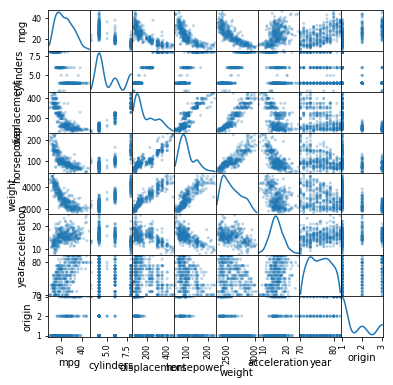

In [8]:
scatter_matrix(auto_quant, alpha=0.3, figsize=(6, 6),
               diagonal='kde')
plt.show()

c. Compute the correlation matrix for the quantitative variables (8×8) using the `DataFrame.corr()` method.

In [9]:
auto_quant.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


d. Estimate the following multiple linear regression model of `mpg` on all other quantitative variables, where $u_i$ is an error term for each observation, using Python’s `statsmodels.api.OLS()` function.

First, I'll add a constant vector to the dataframe to allow for the inclusion of $\beta_0$.

In [7]:
auto_quant['const'] = 1
auto_quant[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,const
0,18.0,8,307.0,130.0,3504,12.0,70,1,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,1


Now I can build the model.

In [11]:
auto_reg = sm.OLS(endog=auto_quant['mpg'], exog=auto_quant[['const','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'origin', 'year']], missing='drop')
results = auto_reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        12:33:22   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

*i. Which of the coefficients is statistically significant at the 1% level?*

The constant, displacement, weight, origin, and year coefficients are all statistically signifcant at the 1% level, with calculated p-values less than 0.01

*ii. Which of the coefficients is NOT statistically significant at the 10% level?*

The cylinders, horsepower, and acceleration coefficients are not statistically significant at the 10% level, with calculated p-values greater than 0.1.

*iii. Give an interpretation in words of the estimated coefficient $\beta_6$ on ${year}_i$ using the estimated value of $\beta_6$.*

With an estimated coefficient of approximately 0.75, this model suggests that, when holding all other variables constant, incrementing the year of a car's origin by one results in (approximately) a .75mpg increase in a car's expected gas mileage.

e. Looking at your scatterplot matrix from part (b), what are the three variables that look most likely to have a nonlinear relationship with $mpg_i$?

Based on the scatterplot matrix, ${dispacement}_i$, ${horsepower}_i$, and ${weight}_i$ all seem to have a nonlinear relationship with ${mpg}_i$; in all three cases, an increase in the variable of interest is associated with an exponential decrease in ${mpg}_i$.

*i. Estimate a new multiple regression model by OLS in which you include squared terms on the three variables you identified as having a nonlinear relationship to $mpg_i$ as well as a squared term on $acceleration_i$.*

In [8]:
auto_quant['displacement_sq'] = auto_quant['displacement']**2
auto_quant['horsepower_sq'] = auto_quant['horsepower']**2
auto_quant['weight_sq'] = auto_quant['weight']**2
auto_quant['acceleration_sq'] = auto_quant['acceleration']**2

In [23]:
auto_reg_sq = sm.OLS(endog=auto_quant['mpg'], exog=auto_quant[['const','cylinders', 'displacement', 'displacement_sq', 'horsepower', 'horsepower_sq', 'weight', 'weight_sq', 'acceleration', 'acceleration_sq', 'origin', 'year']], missing='drop')
results = auto_reg_sq.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        12:51:01   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              20.1084      6.696     

*ii. Report your adjusted R-squared statistic. Is it better or worse than the adjusted R-squared from part (d)?*

This model's adjusted R-squared statistic is .866, which, compared to the previous model's adjusted R-squared statistic of .818, indicates that this model has more explanatory power than the previous one (i.e., it explains more of the variance when controlling for the number of parameters.)

*iii. What happened to the statistical significance of the $displacement_i$ variable coefficient and the coefficient on its squared term?*

The coefficients for the displacement variable and its squared term lost statistical significance, meaning those variables do not explain any more variance than the new squared terms.

*iv. What happened to the statistical significance of the cylinders variable?*

The cylinders variable also lost statistical significance – the new squared terms seem to be better predictors.

f. Using the regression model from part (e) and the `.predict()` function, what would be the predicted miles per gallon $mpg$ of a car with 6 cylinders, displacement of 200, horsepower of 100, a weight of 3,100, acceleration of 15.1, model year of 1999, and origin of 1?

In [31]:
cyl = 6
disp = 200.0
horse = 100.0
wgt = 3100
acc = 15.1
yr = 99
origin = 1
results.predict(exog = [1, cyl, disp, disp**2, horse, horse**2, wgt, wgt**2, acc, acc**2, yr, origin])

array([22.01482819])

Based on the regression model from part (e), a car as specified above would be expected to have an mileage of approximately 22 miles per gallon.

#### Problem 2

a. Compute the Euclidean distance between each observation and the test point  $X_1 =X_2 =X_3 =0$.

In [62]:
def dist(p1, p2, p3, q1, q2, q3):
    d = np.sqrt((q1 - p1)**2 + (q2 - p2)**2 + (q3 - p3)**2)
    return d

In [63]:
kkndf = pd.DataFrame({'X1':[0,2,0,0,-1,1], 'X2': [3,0,1,1,0,1], 'X3': [0,0,3,2,1,1], 'Y': ['Red', 'Red', "Red", "Green", 'Green', 'Red']})

In [64]:
kkndf['euc_dist_origin'] = kkndf.apply(lambda row: dist(0, 0, 0, row["X1"], row["X2"], row["X3"]), axis=1)

In [65]:
kkndf

,X1,X2,X3,Y,euc_dist_origin
0,0,3,0,Red,3.000000
1,2,0,0,Red,2.000000
2,0,1,3,Red,3.162278
3,0,1,2,Green,2.236068
4,-1,0,1,Green,1.414214
5,1,1,1,Red,1.732051


b. What is our KNN prediction with $K$ = 1? Why?

With $K$ = 1, we predict that the observation at $X_1 = X_2 = X_3 = 0$ has an outcome variable of $Y$ = Green. This is because the one nearest neighbor, as computed by Euclidean Distance, is the observation at $X_1 = -1, X_2 = 0, X_3 = 1$, with a computed distance of 1.414. This observation has an outcome variable of $Y$ = Green, so we would predict the same for the test observation.

c. What is our KNN prediction with $K$ = 3? Why?

To determine our prediction for the test observation's outcome variable at $K$ = 3, we have to look at the outcome variable values for the three nearest neighbor observations. The three nearest neighbors have outcome variable values of Green, Red, and Red (for observation numbers 4, 5, and 1 respectively), so we would predict that the test observation has an outcome variable value of $Y$ = Red.

d. If the Bayes (optimal) decision boundary in this problem is highly nonlinear, then would we expect the best value for $K$ to be large or small? Why?

If the optimal decision boundary is nonlinear, the best value for $K$ would be small. Small $K$ values generally create nonlinear decision boundaries because the decisions are much more nuanced – small variations in the training data (which are sometimes more attributable to noise) can significantly alter the contours of the decision boundary.

e. Use Python's `scikit-learn` library to estimate the KNN classifier of the test point $X_1 =X_2 =X_3 =1$ with $K=2$.

In [88]:
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
X_train = np.array(kkndf.iloc[:,:3])
y_train = np.array(kkndf['Y'])
x_test = np.array([[1,1,1]])


In [89]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [93]:
pred = knn.predict(x_test)
print(pred)

['Green']


#### Problem 3

In [9]:
auto["mpg_high"] = auto['mpg'].apply(lambda x: int(x>= np.median(auto['mpg'])))

a. Use `statsmodel.api` to estimate the logistic regression of `mpg_high` on the regressors from Exercise 1: number of cylinders (`cyl`), engine displacement (`dspl`), horsepower (`hpwr`), vehicle weight (`wgt`), acceleration (`accl`), vehicle year (`yr`), vehicle origin (`orgn`). Make sure to include a constant term. Report all the regressors that have coefficients that are statistically significant at the 5% level (p<0.05).

In [52]:
auto['const'] = 1

In [53]:
auto[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_high,const
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0,1


I was getting a strange error about a missing function deep within the summary call, so I am defining this lambda function as a workaround.

In [50]:
scipy.stats.chisqprob = lambda chisq, df: scipy.stats.chi2.sf(chisq, df)

In [51]:
LogitModel = sm.Logit(endog=auto['mpg_high'], exog=auto[['const', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']], missing = 'drop')
LogitReg_sm = LogitModel.fit()
LogitReg_sm.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        17:37:18   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021      0.012      0.174      0.862      -0.021       0.026
horsepower      -0.0410      0.024     -1.718      0.086      -0.088       0.006
weight          -0.0043      0.001     -3.784      0.000      -0.007      -0.002
acceleration     0.0161      0.141      0.114      0.910      -0.261       0.293
year             0.4295      0.075      5.709      0.000       0.282       0.577
origin           0.4773      0.362      1.319      0.187      -0.232       1.187
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

According to the logistic model, weight and year are the only variables that have regressors significant at the 95% level.

(b) Divide the data into a training set of half of the data randomly selected and a test set of the remaining half of the data using the `.train_test_split` module of the `scikit-learn.cross_validation` package. Set the `test_size = 0.5` and set the `random_state = 10`.


In [64]:
from sklearn.cross_validation import train_test_split

/Users/josephdenby/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [75]:
auto[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_high,const
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0,1


In [77]:
auto.dropna(inplace=True)

In [78]:
X = auto.iloc[:,1:8].values
y = auto['mpg_high'].values

In [79]:
num_obs = X.shape[0]
const_vec = np.ones(num_obs).reshape((num_obs, 1))
XplusConst = np.hstack((const_vec, X))


In [80]:
X_train, X_test, y_train, y_test = \
    train_test_split(XplusConst, y, test_size = 0.5, random_state=10)

c. Use `scikit-learn` to estimate a logistic regression model on the training data. Report your estimated intercept $\beta_0$ and coefficients ($\beta_1$, $\beta_2$, ...$\beta_7$). [Note. These estimates will be different from the estimates in part (a) because you are only using half the data.]

In [81]:
X_train

array([[  1. ,   4. ,  89. , ...,  14. ,  79. ,   2. ],
       [  1. ,   4. ,  79. , ...,  16.9,  81. ,   3. ],
       [  1. ,   6. , 173. , ...,  12.9,  79. ,   1. ],
       ...,
       [  1. ,   6. , 198. , ...,  15.5,  70. ,   1. ],
       [  1. ,   6. , 232. , ...,  16. ,  74. ,   1. ],
       [  1. ,   4. , 134. , ...,  14.2,  78. ,   3. ]])

In [82]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
LogReg.intercept_

array([-0.06815766])

$\beta_0 = -.068$

In [85]:
LogReg.coef_

array([[-0.06815766, -0.65437267,  0.00558039, -0.03896025, -0.0049946 ,
        -0.14280686,  0.30000888, -0.14971182]])

$\beta_1  =.654$, $\beta_2 = .006$, $\beta_3 = -.039$, $\beta_4 = -.005$, $\beta_5 = -.143$, $\beta_6 = .300$, $\beta_7 = -.150$

(d) Create predicted values of `mpg_high` for the test set and calculate the `confusion matrix` and `classification report` for the Logit model on the test data. Does this model predict low mpg (`mpg high=0`) or high mpg (`mpg high=1`) better?

In [92]:
y_pred = LogReg.predict(X_test)

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [12, 85]])

In [94]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



Based on the confusion matrix and classification report, it appears that the model predicts low and high mpg at about the same accuracy rate (~87%).